In [3]:
# import pandas as pd 

In [4]:
pip install quandal

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement quandal (from versions: none)
ERROR: No matching distribution found for quandal
You should consider upgrading via the 'c:\users\shubh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install quandl

You should consider upgrading via the 'c:\users\shubh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [40]:
import pandas as pd 
import quandl
import matplotlib.pyplot as plt 

In [5]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [6]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date = end)
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)

In [7]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [13]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [14]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [17]:
# aapl.tail()

In [ ]:
# 30% in appl
# 20% in cics
# 40% in amzn
# 10% in IBM

In [18]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn), [.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']* allo 

In [19]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [20]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Value'] = stock_df['Allocation']* 1000000

In [22]:
aapl.tail()

,Adj. Close,Normed Return,Allocation,Position Value
Date,,,,
2016-12-23,115.080808,2.177549,0.653265,653264.617079
2016-12-27,115.811668,2.191378,0.657413,657413.396830
2016-12-28,115.317843,2.182034,0.654610,654610.167268
2016-12-29,115.288214,2.181473,0.654442,654441.973495
2016-12-30,114.389454,2.164467,0.649340,649340.095692


In [24]:
# cisco.tail()

In [29]:
portfolio_val = pd.concat([aapl['Position Value'], cisco['Position Value'],ibm['Position Value'],amzn['Position Value']], axis=1)
                    

In [35]:
portfolio_val.columns = ['AAPL pos','CISCO Pos','IBM Pos','AMZN Pos']

In [37]:
portfolio_val.tail()

,AAPL pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119


In [38]:
portfolio_val['total Pos'] = portfolio_val.sum(axis=1)

In [39]:
portfolio_val.head()

,AAPL pos,CISCO Pos,IBM Pos,AMZN Pos,total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


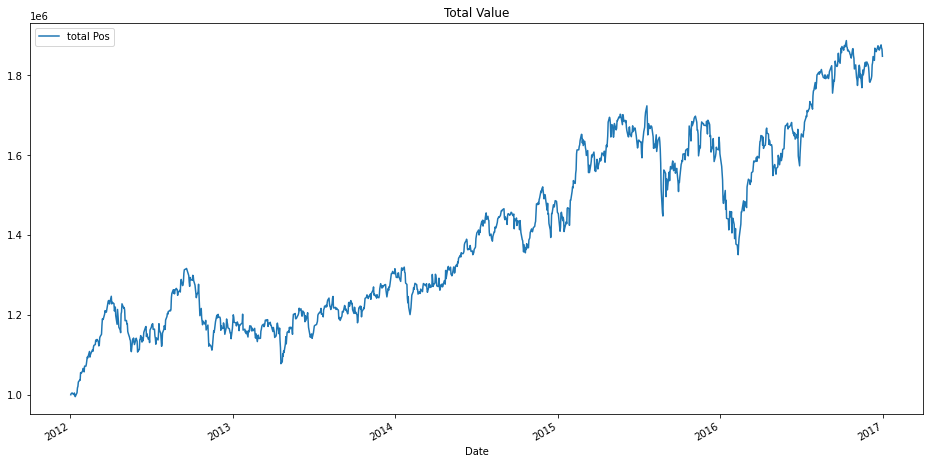

In [41]:
portfolio_val['total Pos'].plot(title='Total Value', figsize = (16,8))
plt.legend()
plt.show()

In [43]:
from pandas.plotting import scatter_matrix

In [49]:
# scatter_matrix('AAPL Pos', title = 'Portfolio of AAPL', figsize=(16,8))

<AxesSubplot:xlabel='Date'>

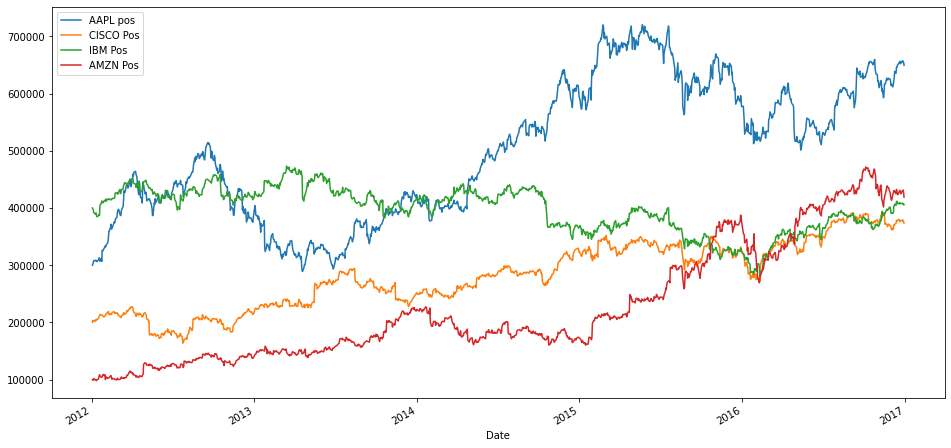

In [45]:
portfolio_val.drop('total Pos', axis= 1).plot(figsize=(16,8))

In [52]:
portfolio_val['Daily Return'] = portfolio_val['total Pos'].pct_change(1)

In [62]:
# portfolio_val.sort_values('Daily Return', ascending = False)

In [69]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [70]:
portfolio_val['Daily Return'].std()

0.010568287769161725